In [23]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
import csv
import math


#ピクセル数をmmに変換するー
path='C:\\Users\\flow\\Desktop\\2022.2.24ctab\\image\\'
filename="C:\\Users\\flow\\Desktop\\輪郭検出データ\\2022.2.24ctab長さ.mp4"
cap = cv2.VideoCapture(filename=filename)
num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        if num<3:
            mm_img=cv2.imwrite(path+"mmpicture{:0=3}".format(num)+".bmp",frame)
            #print("save mmpicture{:0=3}".format(num)+".bmp")
            num+=1
    else:
        break  
cap.release() 

#画像クリックしたところの座標取得
#画像の上下端の座標とる際に同じx座標の位置をプロットしないと正しい距離が出せないから注意!!
file_name=path+'mmpicture001.bmp'
img=cv2.imread(file_name,cv2.IMREAD_GRAYSCALE)
global x
global y
xlist=[]
ylist=[]
def click_pos(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        img2 = np.copy(img)
        cv2.circle(img2,center=(x,y),radius=5,color=255,thickness=-1)
        pos_str='(x,y)=('+str(x)+','+str(y)+')'
        cv2.putText(img2,pos_str,(x+10, y+10),cv2.FONT_HERSHEY_PLAIN,2,255,2,cv2.LINE_AA)
        cv2.imshow('window', img2)
        #print(x,y)
        xlist.append(x)
        ylist.append(y)
        
cv2.imshow('window', img)
cv2.setMouseCallback('window', click_pos)
cv2.waitKey(0)
cv2.destroyAllWindows() 
print(xlist)
print(ylist)
dis_list=[]
for a in range(len(xlist)-1):
    x1=xlist[a]
    x2=xlist[a+1]
    y1=ylist[a]
    y2=ylist[a+1]
    dis=((x1-x2)**2+(y1-y2)**2)**(1/2)
    dis_list.append(dis)
    #print(x1,y1,x2,y2)
    #print(dis)
mean=sum(dis_list)/float(len(dis_list))
print(mean)
mm=mean/10
print('ピクセル数/mm=',mm,'p/mm')
list_mm=['ピクセル数/mm=',mm,'p/mm']
#--------------------------------------------------------------------------------------------------------------------------
#csvファイルに保存してくよ
import csv
with open(path+'mmchange.csv','w',newline='') as f:
    writer = csv.writer(f)
    writer.writerow(list_mm)


[1115, 1541]
[255, 266]
426.1419951143046
ピクセル数/mm= 42.61419951143046 p/mm


In [24]:
###輪郭検出####

# ビデオデータの読み込み
filename ="C:\\Users\\flow\\Desktop\\輪郭検出データ\\2022.2.24ctab振動.mp4"
# 動画の読み込み
cap = cv2.VideoCapture(filename=filename)
#動画ファイルの情報を取得する
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
hight = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
total_frame = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)

#print("動画の幅: ", width)
#print("動画の高さ: ", hight)
print("総フレーム数: ", total_frame)
print("fps: ", fps)
#print("動画の長さ: ", total_frame/fps, "[sec]")

#print(type(cap))
#print(cap.isOpened())
#-----------------------------------------------------------------------------------------------------------------
num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        if num<204:
        
            img=cv2.imwrite(path+"picture{:0=3}".format(num)+".bmp",frame)
            #print("save picture{:0=3}".format(num)+".bmp")
            img1=cv2.imread(path+"picture{:0=3}".format(num)+".bmp")
            #print(type(img1))
            img2=cv2.rotate(img1,cv2.ROTATE_90_COUNTERCLOCKWISE)
            kaiten_img=cv2.imwrite(path+"kaitenpicture{:0=3}".format(num)+".bmp",img2)
            #print("save kaitenpicture{:0=3}".format(num)+".bmp")
            num += 1
        
    else:
        break

cap.release()
#--------------------------------------------------------------------------------------------------------------
# 静止画像の抜き出し
# 入力画像の読み込み
i=-30
j=0
idx_max_list=[]
idx_min_list=[]
for a in range(int(num/30)):
    i+=30
    j+=30
    #print('フレーム範囲',i,j)
    Area_list=[]
    for b in range(i,j):    

        img3 = cv2.imread(path+"kaitenpicture{:0=3}".format(b)+".bmp")
        
        #グレースケールに変換
        gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)    
        # グレースケール画像の書き込み
        cv2.imwrite(path+"graypicture{:0=3}".format(b)+".bmp", gray)
        #print("save graypicture{:0=3}".format(b)+".bmp")
    #---------------------------------------------------------------------------------------------------------------  
        # 2値化する。
        #ret, binary = cv2.threshold(gray,70, 255, cv2.THRESH_BINARY_INV)
        ret, binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        cv2.imwrite(path+"nichipicture{:0=3}".format(b)+".bmp",binary)

        #見つけた輪郭を元画像に描画
        contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        img4=cv2.imread(path+"kaitenpicture{:0=3}".format(b)+".bmp")
        #print(cv2.contourArea(contours[len(contours)-1]))
        for k in range(len(contours)):
                #最上層の階層を描画（緑）
            if hierarchy[0][k][3] ==-1:        
                cv2.drawContours(img4, contours, k, (0, 255, 0), 2)
            #2階層目を描画（水色）
            else:
                cv2.drawContours(img4, contours, k, (0, 255, 255), 2)
        cv2.imwrite(path+"rinkakupicture{:0=3}".format(b)+".bmp",img4)
        #print("save rinkakupicture{:0=3}".format(b)+".bmp")
    #----------------------------------------------------------------------------------------
        #気泡の面積出して膨張・収縮判断する
        MAX_list= max(contours, key=lambda x: cv2.contourArea(x))
        Area= cv2.contourArea(MAX_list)
        #print('area{:0=3}'.format(b),Area)

    #面積をリストに格納からの面積の大きさ可視化
        Area_list.append(Area)
    #print(Area_list)
    max_Area=max(Area_list)
    min_Area=min(Area_list)
    #print(max_Area)    
    #print(min_Area)        
    max_num=Area_list.index(max_Area)
    min_num=Area_list.index(min_Area) 
    #print('膨張だお',max_num)
    #print('収縮だお',min_num)

    #写真の本当の番号指定
    idx_max=max_num+30*a
    idx_min=min_num+30*a
    print('膨張idx',idx_max)
    #print('収縮idx',idx_min)
    idx_max_list.append(idx_max)
    idx_min_list.append(idx_min)

#-------------------------------------------------------------------------------------------------------------------------------  
    #対応する画像保存だよー
    path1='C:\\Users\\flow\\Desktop\\2022.2.24ctab\\bouchoshushuku\\'
    puffed_img=cv2.imread(path+"kaitenpicture{:0=3}".format(idx_max)+".bmp")  
    shrink_img=cv2.imread(path+"kaitenpicture{:0=3}".format(idx_min)+".bmp")
    cv2.imwrite(path1+"bouchoupicture{:0=3}".format(a)+".bmp",puffed_img)
    cv2.imwrite(path1+"shushukupicture{:0=3}".format(a)+".bmp",shrink_img)  
#---------------------------------------------------------------------------------------
#print(idx_max_list)
#print(idx_min_list)


総フレーム数:  360.0
fps:  29.97002997002997
膨張idx 1
膨張idx 59
膨張idx 61
膨張idx 90
膨張idx 148
膨張idx 150


In [25]:
#膨張・収縮時で速度出すよ
#膨張バージョン
n=-1
m=1
#idx_max_list
u_list=[]
s_list=[]
y_list=[]
#print(idx_max_list)
for c in range(len(idx_max_list)-1):
        n+=1
        m=n+1
        #print('範囲',n,m)
        frame1=cv2.imread(path1+"bouchoupicture{:0=3}".format(n)+".bmp")
        frame2=cv2.imread(path1+"bouchoupicture{:0=3}".format(m)+".bmp")
        #print("save frame1picture{:0=3}".format(n)+".bmp")
        #print("save frame2picture{:0=3}".format(m)+".bmp")
        gray1=cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
        gray2=cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
        ret,th_otsu1 = cv2.threshold(gray1,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        ret,th_otsu2 = cv2.threshold(gray2,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

        #モーメント関数で3次までのモーメントを取得
        mu1 = cv2.moments(th_otsu1)
        mu2 = cv2.moments(th_otsu2)
        #図心を出す
        x1,y1= int(mu1["m10"]/mu1["m00"]) , int(mu1["m01"]/mu1["m00"])
        x2,y2= int(mu2["m10"]/mu2["m00"]) , int(mu2["m01"]/mu2["m00"])
        y_list.append(y1)
        y_list.append(y2)
        #図心を画像に記載する
        cv2.circle(frame1,(x1,y1),20,(0,0,255),-1)
        if c==len(idx_max_list)-1:
                cv2.circle(frame2,(x2,y2),20,(0,0,255),-1)
                cv2.imwrite(path1+'bouchoframe_moment{:0=3}'.format(m)+".bmp",frame2)
        else:
        #画像を表示する
                cv2.imwrite(path1+'bouchoframe_moment{:0=3}'.format(n)+".bmp",frame1)
        #plt.imshow(frame)
        #plt.show
        #print(y1,y2)
        
#----------------------------------------------------------------
#速度出すよ
        y_ex=y2-y1
        idx_y1=idx_max_list[n]
        idx_y2=idx_max_list[m]
        s_ex=(idx_y2-idx_y1)/30
        #print(idx_y1,idx_y2)
        v_ex=y_ex/s_ex
        #print('速度',v,'p/s')
#p/sをmm/sに変換してくよ
        u_ex=v_ex/mm
        u_list.append(u_ex)
        s_list.append(s_ex)
        print('膨張時上昇速度',u_ex,'mm/s')
#print(y_list)
        
#収縮時バージョン
n=-1
m=1
#idx_min_list
uuu_list=[]
sss_list=[]
yyy_list=[]
#print(idx_min_list)
for f in range(len(idx_min_list)-1):
        n+=1
        m=n+1
        #print('範囲',n,m)
        frame1=cv2.imread(path1+"shushukupicture{:0=3}".format(n)+".bmp")
        frame2=cv2.imread(path1+"shushukupicture{:0=3}".format(m)+".bmp")
        #print("save frame1picture{:0=3}".format(n)+".bmp")
        #print("save frame2picture{:0=3}".format(m)+".bmp")
        gray1=cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
        gray2=cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
        ret,th_otsu1 = cv2.threshold(gray1,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        ret,th_otsu2 = cv2.threshold(gray2,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

        #モーメント関数で3次までのモーメントを取得
        mu1 = cv2.moments(th_otsu1)
        mu2 = cv2.moments(th_otsu2)
        #図心を出す
        x1,y1= int(mu1["m10"]/mu1["m00"]) , int(mu1["m01"]/mu1["m00"])
        x2,y2= int(mu2["m10"]/mu2["m00"]) , int(mu2["m01"]/mu2["m00"])
        yyy_list.append(y1)
        yyy_list.append(y2)
        #図心を画像に記載する
        cv2.circle(frame1,(x1,y1),20,(0,0,255),-1)
        if c==len(idx_min_list)-1:
                cv2.circle(frame2,(x2,y2),20,(0,0,255),-1)
                cv2.imwrite(path1+'shushukuframe_moment{:0=3}'.format(m)+".bmp",frame2)
        else:
        #画像を表示する
                cv2.imwrite(path1+'shushukuframe_moment{:0=3}'.format(n)+".bmp",frame1)
        #plt.imshow(frame)
        #plt.show
        #print(y1,y2)
#----------------------------------------------------------------
#速度出すよ
        y_con=y2-y1
        idx_y1=idx_min_list[n]
        idx_y2=idx_min_list[m]
        s_con=(idx_y2-idx_y1)/30
        #print(idx_y1,idx_y2)
        v_con=y_con/s_con
        #print('速度',v,'p/s')
#p/sをmm/sに変換してくよ
        u_con=v_con/mm
        uuu_list.append(u_con)
        sss_list.append(s_con)
        print('収縮時上昇速度',u_con,'mm/s')        


膨張時上昇速度 1.9056299891293724 mm/s
膨張時上昇速度 0.351995348310521 mm/s
膨張時上昇速度 1.8692166772351804 mm/s
膨張時上昇速度 1.759976741552605 mm/s
膨張時上昇速度 0.351995348310521 mm/s
収縮時上昇速度 1.8303758112147093 mm/s
収縮時上昇速度 1.8069094546606745 mm/s
収縮時上昇速度 1.759976741552605 mm/s
収縮時上昇速度 1.7365103849985704 mm/s
収縮時上昇速度 1.689577671890501 mm/s


In [30]:
#自然上昇時の速度
filename ="C:\\Users\\flow\\Desktop\\輪郭検出データ\\2022.2.24ctab自然.mp4"
cap = cv2.VideoCapture(filename=filename)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
hight = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
total_frame = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)
#print("動画の幅: ", width)
#print("動画の高さ: ", hight)
#print("総フレーム数: ", total_frame)
#print("fps: ", fps)
#print("動画の長さ: ", total_frame/fps, "[sec]")
path2='C:\\Users\\flow\\Desktop\\2022.2.24ctab\\natural\\'
num = 0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        if num>=106:   
            natural_img=cv2.imwrite(path2+"picture{:0=3}".format(num)+".bmp",frame)
            #print("save picture{:0=3}".format(num)+".bmp")
            natural_img1=cv2.imread(path2+"picture{:0=3}".format(num)+".bmp")
            #print(type(img1))
            natural_img2=cv2.rotate(natural_img1,cv2.ROTATE_90_COUNTERCLOCKWISE)
            kaiten_img=cv2.imwrite(path2+"kaitenpicture{:0=3}".format(num)+".bmp",natural_img2)
            #print("save kaitenpicture{:0=3}".format(num)+".bmp")
            num+=1
        else:
            num+=1    
    else:
        break  
cap.release()
 
#--------------------------------------------------------------------------------------------------------------
#膨張時の画像と対応する画像の抜き出しする
#print(b_max_list)
print(num)
for a in range(num):
    if a%30==0:
    
        natural_img3=cv2.imread(path2+"kaitenpicture{:0=3}".format(a)+".bmp")  
    
#グレースケールに変換
        gray = cv2.cvtColor(natural_img3, cv2.COLOR_BGR2GRAY) 
        # グレースケール画像の書き込み
        cv2.imwrite(path2+"graypicture{:0=3}".format(a)+".bmp", gray)
        print("save graypicture{:0=3}".format(a)+".bmp")
        


        #---------------------------------------------------------------------------------------------------------------  
        # 2値化する。
        #ret, binary = cv2.threshold(gray,70, 255, cv2.THRESH_BINARY_INV)
        ret, binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        cv2.imwrite(path2+"nichipicture{:0=3}".format(a)+".bmp",binary)
        #見つけた輪郭を元画像に描画
        contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        natural_img4=cv2.imread(path2+"kaitenpicture{:0=3}".format(a)+".bmp")
        #print(cv2.contourArea(contours[len(contours)-1]))
        for k in range(len(contours)):
                #最上層の階層を描画（緑）
            if hierarchy[0][k][3] ==-1:        
                cv2.drawContours(natural_img4, contours, k, (0, 255, 0), 2)
            #2階層目を描画（水色）
            else:
                cv2.drawContours(natural_img4, contours, k, (0, 255, 255), 2)
        cv2.imwrite(path2+"rinkakupicture{:0=3}".format(a)+".bmp",natural_img4)
        #print("save rinkakupicture{:0=3}".format(b)+".bmp")
    #--------------------------------------------------------------------
    #上昇速度出すんご
    uu_list=[]
    ss_list=[]
    yy_list=[]
    n=-30

    for taishi in range((num-1)):
        n+=30
        m=n+1
        #print('範囲',n,m)    

        frame1=cv2.imread(path2+"kaitenpicture{:0=3}".format(n)+".bmp")
        frame2=cv2.imread(path2+"kaitenpicture{:0=3}".format(m)+".bmp")
        #print("save frame1picture{:0=3}".format(n)+".bmp")
        #print("save frame2picture{:0=3}".format(m)+".bmp")
        gray1=cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
        gray2=cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
        ret,th_otsu1 = cv2.threshold(gray1,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
        ret,th_otsu2 = cv2.threshold(gray2,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

        #モーメント関数で3次までのモーメントを取得
        mu1 = cv2.moments(th_otsu1)
        mu2 = cv2.moments(th_otsu2)
        #図心を出す
        x1,y1= int(mu1["m10"]/mu1["m00"]) , int(mu1["m01"]/mu1["m00"])
        x2,y2= int(mu2["m10"]/mu2["m00"]) , int(mu2["m01"]/mu2["m00"])
        yy_list.append(y1)
        yy_list.append(y2)
        #図心を画像に記載する
        cv2.circle(frame1,(x1,y1),20,(0,0,255),-1)
        if taishi==num-1:
            cv2.circle(frame2,(x2,y2),20,(0,0,255),-1
            )
            cv2.imwrite(path2+'naturalframe_moment{:0=3}'.format(m)+".bmp",frame2)
        else:
        #画像を表示する
            cv2.imwrite(path2+'naturalframe_moment{:0=3}'.format(n)+".bmp",frame1)
        #plt.imshow(frame)
        #plt.show
        #print(y1,y2)
    #----------------------------------------------------------------
    #速度出すよ
        y_nat=y2-y1
        b_y1=n
        b_y2=m
        s_nat=(b_y2-b_y1)/30
        #print(b_y1,b_y2)
        v_nat=y_nat/s_nat
        #print('速度',v,'p/s')
    #p/sをmm/sに変換してくよ
        u_nat=v_nat/mm
        uu_list.append(u_nat)
        ss_list.append(s_nat)
        print('自然上昇時上昇速度',u_nat,'mm/s')

345


error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [27]:
#グラフ作るよ
#idx_max_list
#膨張バージョン
t1_plot=[]
for i in range(len(idx_max_list)):
    t1_idx=idx_max_list[i]/30
    #x_idx=idx_max_list[i]/30
    t1_plot.append(t1_idx)
#print(t1_plot)  
x1=t1_plot
#y座標の重複を取り除く 
y_plot1=[]
y_plot2=[]
#print(y_list)
for j in y_list:
    if not j in y_plot1:
        y_plot1.append(j)
#print(y_plot1)
for l in range(len(y_plot1)):
    #print(l)       
    y1_mm=y_plot1[l]/mm
    y_plot2.append(y1_mm)
#print(y_plot2)    
y1=y_plot2
#収縮バージョン
t2_plot=[]
for o in range(len(idx_min_list)):
    t2_idx=idx_min_list[o]/30
    #x_idx=idx_min_list[i]/30
    t2_plot.append(t2_idx)
#print(t2_plot)  
x2=t2_plot 
#y座標の重複を取り除く 
y_plot3=[]
y_plot4=[]
#print(yyy_list)
for p in yyy_list:
    if not p in y_plot3:
        y_plot3.append(p)
#print(y_plot3)
for q in range(len(y_plot3)):
    #print(q)       
    y2_mm=y_plot3[q]/mm
    y_plot4.append(y2_mm)
#print(y_plot4)
y2=y_plot4

#自然上昇バージョン
t3_plot=[]
for s in range(len(idx_min_list)):
    t3_idx=idx_min_list[s]/30
    #x_idx=idx_min_list[i]/30
    t3_plot.append(t3_idx)
#print(t2_plot)  
x3=t3_plot 
#y座標の重複を取り除く 
y_plot5=[]
y_plot6=[]
#print(y_list)
for t in yy_list:
    if not t in y_plot5:
        y_plot5.append(t)
#print(y_plot5)
for u in range(len(y_plot5)):
    #print(l)       
    y3_mm=y_plot5[u]/mm
    y_plot6.append(y3_mm)
y3=y_plot6
#print(x1,x2,x3)
#各々速度の平均値だす
mean_ex=round(sum(u_list)/float(len(u_list)),4)
mean_con=round(sum(uuu_list)/float(len(uuu_list)),4)
mean_nat=round(sum(uu_list)/float(len(uu_list)),4)
#print(mean_ex,mean_con,mean_nat)
fig, ax = plt.subplots()
ax.text(5,10,'expansion phase:'+str(mean_ex)+'[mm/s]',size=12,color='black')
ax.text(5,8,'contraction phase:'+str(mean_con)+'[mm/s]',size=12,color='black')
ax.text(5,6,'natural phase:'+str(mean_nat)+'[mm/s]',size=12,color='black')

plt.plot(x1,y1,marker='.',color="red",label='expansion')
plt.plot(x2,y2,marker='.',color="blue",label='contraction')
plt.plot(x3,y3,marker='.',color="green",label='natural')
plt.title('Bubble rising velocity')
plt.xlabel('t [s]')
plt.ylabel('y [mm]')
plt.xlim(t2_plot[0])
plt.ylim(0)
plt.show
plt.legend()
plt.savefig(path1+'velocitygraph.png')



ZeroDivisionError: float division by zero

ValueError: x and y must have same first dimension, but have shapes (11,) and (10,)

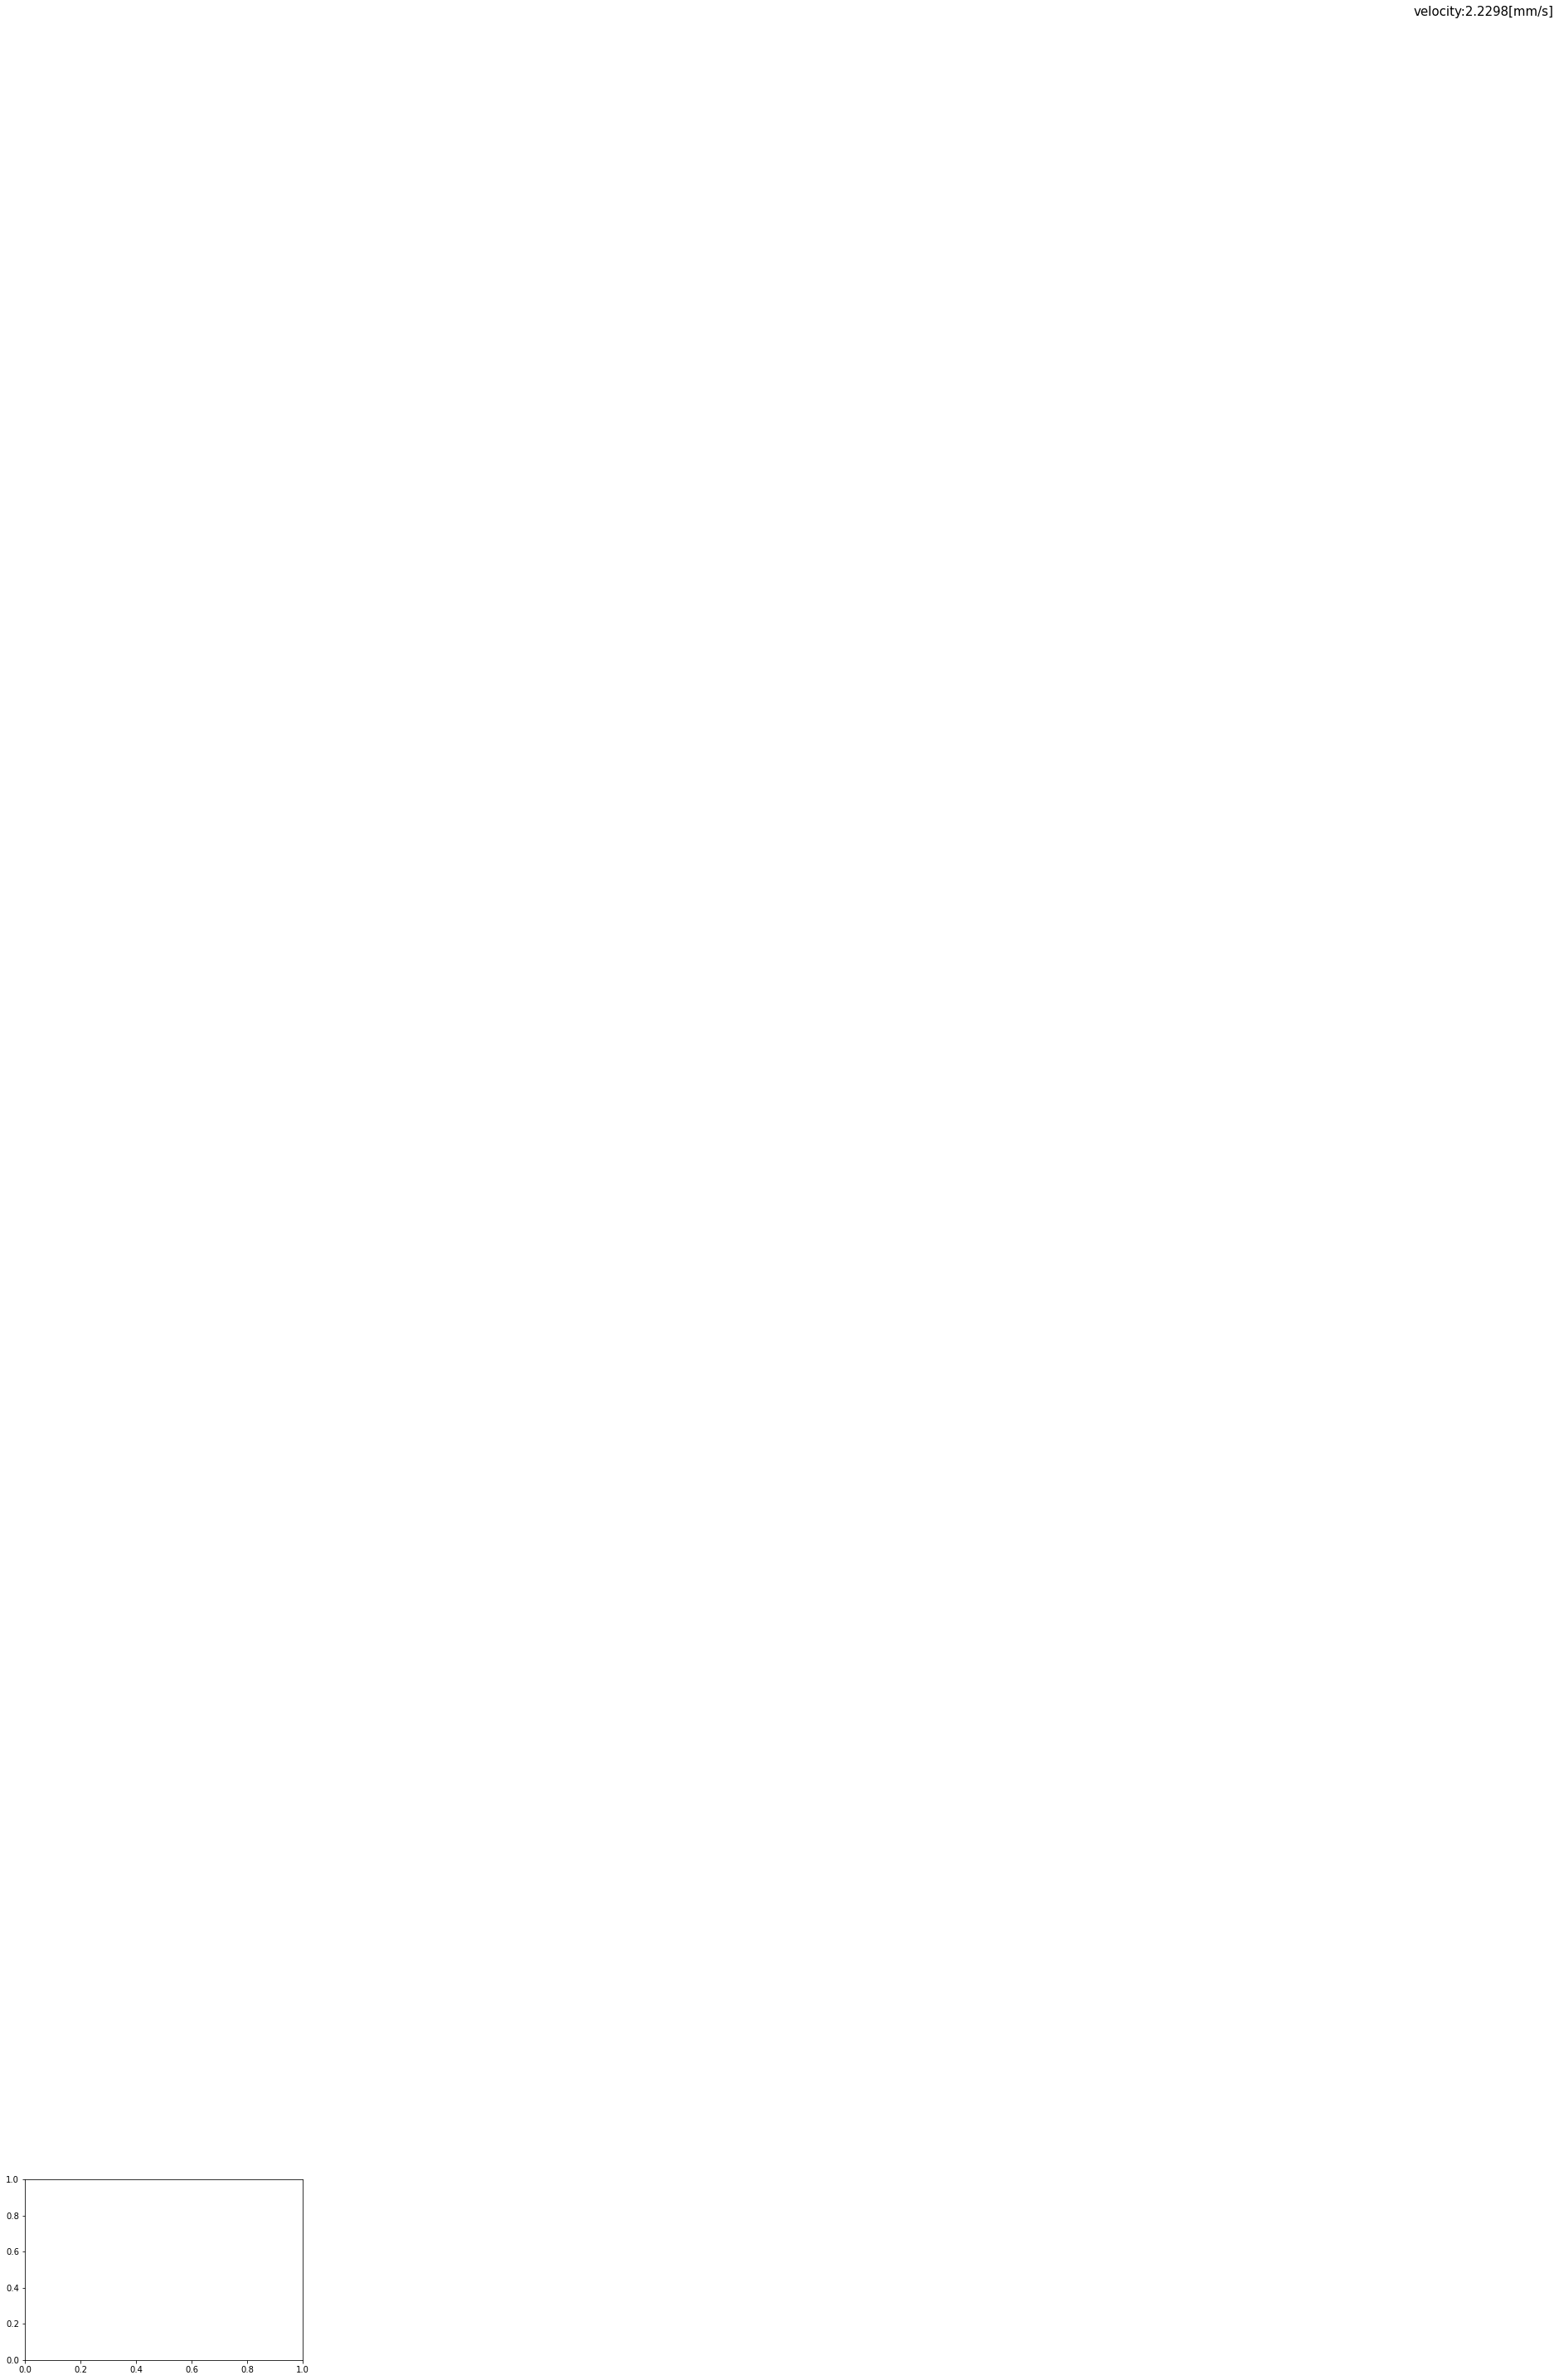

In [ ]:
#上昇速度だすよ
path3='C:\\Users\\flow\\Desktop\\2022.2.24ctab\\guchagucha\\'
i=-10
j=0
u_list=[]
s_list=[]
y_list=[]
num_list=[]
for a in range(int(num/10)):
    i+=10
    j+=10
    #print(i,j)

    frame1=cv2.imread(path+"kaitenpicture{:0=3}".format(i)+".bmp")
    frame2=cv2.imread(path+"kaitenpicture{:0=3}".format(j)+".bmp")
    #print("save frame1picture{:0=3}".format(i)+".bmp")
    #print("save frame2picture{:0=3}".format(j)+".bmp")
    gray1=cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    gray2=cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    ret,th_otsu1 = cv2.threshold(gray1,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    ret,th_otsu2 = cv2.threshold(gray2,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    #モーメント関数で3次までのモーメントを取得
    mu1 = cv2.moments(th_otsu1)
    mu2 = cv2.moments(th_otsu2)
    #図心を出す
    x1,y1= int(mu1["m10"]/mu1["m00"]) , int(mu1["m01"]/mu1["m00"])
    x2,y2= int(mu2["m10"]/mu2["m00"]) , int(mu2["m01"]/mu2["m00"])
    y_list.append(y1)
    y_list.append(y2)
    #図心を画像に記載する
    cv2.circle(frame1,(x1,y1),20,(0,0,255),-1)
    if a==int(num/10):
            cv2.circle(frame2,(x2,y2),20,(0,0,255),-1)
            cv2.imwrite(path3+'_moment{:0=3}'.format(i)+".bmp",frame2)
    else:
    #画像を表示する
            cv2.imwrite(path3+'_moment{:0=3}'.format(j)+".bmp",frame1)
    #plt.imshow(frame)
    #plt.show
    #print(y1,y2)
    #----------------------------------------------------------------
    #速度出すよ
    y=y2-y1
    idx_y1=i
    idx_y2=j
    num_list.append(i)
    num_list.append(j)
    s=(idx_y2-idx_y1)/30
    #print(idx_y1,idx_y2)
    v=y/s
    #print('速度',v,'p/s')
    #p/sをmm/sに変換してくよ
    u=v/mm
    u_list.append(u)
    s_list.append(s)
    #print('上昇速度',u,'mm/s')
    #print(y_list)

#------------------------------------------------------------
#グラフ作るよ
#num_list
t1_list=[]
t2_list=[]
#リストの重複取り除く
for k in num_list:
    if not k in t1_list:
        t1_list.append(k)
#print(t1_list)        
for t in range(len(t1_list)):
    t=t1_list[t]/30
    t2_list.append(t)
#print(t2_list)
tt=t2_list
#y座標の重複を取り除く 
y_plot1=[]
y_plot2=[]
#print(y_list)
for j in y_list:
    if not j in y_plot1:
        y_plot1.append(j)
#print(y_plot1)
for l in range(len(y_plot1)):
    #print(l)       
    y1_mm=y_plot1[l]/mm
    y_plot2.append(y1_mm)
#print(y_plot2)    
yy=y_plot2
#print(len(t2_list))
#print(len(y_plot2))

#各々速度の平均値だす
x=tt
y=yy
#print(tt,yy)
mean=round(sum(u_list)/float(len(u_list)),4)
fig, ax = plt.subplots()
ax.text(5,13,'velocity:'+str(mean)+'[mm/s]',size=15,color='black')
plt.plot(x,y,marker='.',color="red",label='rising velocity')
plt.title('Bubble rising velocity')
plt.xlabel('t [s]')
plt.ylabel('y [mm]')
plt.xlim(0)
plt.ylim(0)
plt.show
plt.legend()
plt.savefig(path1+'velocitygraph.png')


0.9997583027418292


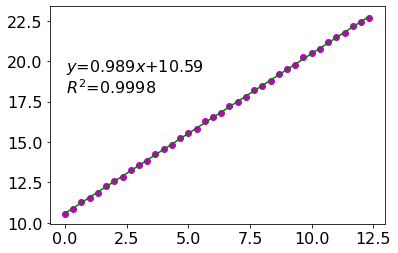

In [ ]:
import scipy.optimize as optimize
import sklearn.metrics as metrics
from scipy import stats
from scipy.optimize import curve_fit
%matplotlib inline
x_data=np.array(t2_list)
y_data=np.array(y_plot2)
#print(y_plot2)
def func(x,a,b):
    f=a*x+b
    return f
popt,pcov=curve_fit(func,x_data,y_data)
residuals =  y_data- func(x_data, popt[0],popt[1])
rss = np.sum(residuals**2)#residual sum of squares = rss
tss = np.sum((y_data-np.mean(y_data))**2)#total sum of squares = tss
r_squared = 1 - (rss / tss)
print(r_squared)
fig = plt.figure(figsize=(6, 4))
plt.rcParams["font.size"] = 16
ax1 = fig.add_subplot(111)
ax1.plot(x_data,y_data,'mo')
ax1.plot(x_data,func(x_data, popt[0],popt[1]),'g-')
ax1.annotate("$R^2$="+str(np.round(r_squared,4)), xy=(0.05, 0.6), xycoords='axes fraction')
ax1.annotate("$y$="+str(np.round(popt[0],3))+"$x$+"+str(np.round(popt[1],3))+"", xy=(0.05,0.7), xycoords='axes fraction')

plt.savefig(path1+"Scipy_curve_fit_linear.png", dpi=120,transparent = False, bbox_inches = 'tight')
plt.show()

In [ ]:
#グラフ作るよ
#idx_max_list
#膨張バージョン
t1_plot=[]
for i in range(len(idx_max_list)):
    t1_idx=idx_max_list[i]/30
    #x_idx=idx_max_list[i]/30
    t1_plot.append(t1_idx)
#print(t1_plot)  
x1=t1_plot
#y座標の重複を取り除く 
y_plot1=[]
y_plot2=[]
#print(y_list)
for j in y_list:
    if not j in y_plot1:
        y_plot1.append(j)
#print(y_plot1)
for l in range(len(y_plot1)):
    #print(l)       
    y1_mm=y_plot1[l]/mm
    y_plot2.append(y1_mm)
#print(y_plot2)    
y1=y_plot2
#収縮バージョン
t2_plot=[]
for o in range(len(idx_min_list)):
    t2_idx=idx_min_list[o]/30
    #x_idx=idx_min_list[i]/30
    t2_plot.append(t2_idx)
#print(t2_plot)  
x2=t2_plot 
#y座標の重複を取り除く 
y_plot3=[]
y_plot4=[]
#print(yyy_list)
for p in yyy_list:
    if not p in y_plot3:
        y_plot3.append(p)
#print(y_plot3)
for q in range(len(y_plot3)):
    #print(q)       
    y2_mm=y_plot3[q]/mm
    y_plot4.append(y2_mm)
#print(y_plot4)
y2=y_plot4

#自然上昇バージョン
t3_plot=[]
for s in range(len(idx_min_list)):
    t3_idx=idx_min_list[s]/30
    #x_idx=idx_min_list[i]/30
    t3_plot.append(t3_idx)
#print(t2_plot)  
x3=t3_plot 
#y座標の重複を取り除く 
y_plot5=[]
y_plot6=[]
#print(y_list)
for t in yy_list:
    if not t in y_plot5:
        y_plot5.append(t)
#print(y_plot5)
for u in range(len(y_plot5)):
    #print(l)       
    y3_mm=y_plot5[u]/mm
    y_plot6.append(y3_mm)
y3=y_plot6
#print(x1,x2,x3)
#各々速度の平均値だす
mean_ex=round(sum(u_list)/float(len(u_list)),4)
mean_con=round(sum(uuu_list)/float(len(uuu_list)),4)
mean_nat=round(sum(uu_list)/float(len(uu_list)),4)
#------------------------------------------------------------
#R2乗値
x1_data=np.array(t1_plot)
y1_data=np.array(y_plot2)
x2_data=np.array(t2_plot)
y2_data=np.array(y_plot4)
x3_data=np.array(t3_plot)
y3_data=np.array(y_plot6)

def func(x,a,b):
    f=a*x+b
    return f
popt,pcov=curve_fit(func,x_data,y_data)
residuals =  y_data- func(x_data, popt[0],popt[1])
rss = np.sum(residuals**2)#residual sum of squares = rss
tss = np.sum((y_data-np.mean(y_data))**2)#total sum of squares = tss
r_squared = 1 - (rss / tss)
#print(mean_ex,mean_con,mean_nat)
fig, ax = plt.subplots()
ax.text(5,10,'expansion phase:'+str(mean_ex)+'[mm/s]',size=12,color='black')
ax.text(5,8,'contraction phase:'+str(mean_con)+'[mm/s]',size=12,color='black')
ax.text(5,6,'natural phase:'+str(mean_nat)+'[mm/s]',size=12,color='black')

plt.plot(x1,y1,marker='.',color="red",label='expansion')
plt.plot(x2,y2,marker='.',color="blue",label='contraction')
plt.plot(x3,y3,marker='.',color="green",label='natural')
plt.title('Bubble rising velocity')
plt.xlabel('t [s]')
plt.ylabel('y [mm]')
plt.xlim(t2_plot[0])
plt.ylim(0)
plt.show
plt.legend()
plt.savefig(path1+'velocitygraph.png')

